## Intro

This is code along tutorial with Analytics Vidhya with this [dataset](https://www.kaggle.com/rakeshrau/social-network-ads)

## Import the module

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
import sklearn

# Import dataset into workspace (kaggle)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/social-network-ads/Social_Network_Ads.csv


In [2]:
# Moving into dataset directory (kaggle)
!pwd
%cd /kaggle/input/social-network-ads/ 

/kaggle/working
/kaggle/input/social-network-ads


## Import dataset

In [3]:
# Import dataset
df = pd.read_csv('Social_Network_Ads.csv')

# Read first five lines from dataset
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## Visualize the data

In [4]:
import seaborn as sns

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

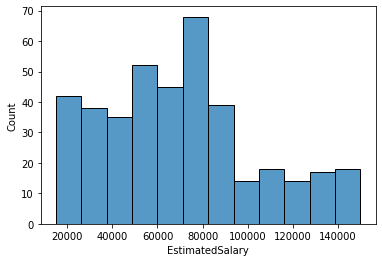

In [5]:
# Salary distribution
sns.histplot(df.EstimatedSalary)

[Text(0.5, 1.0, 'Gender Comparison')]

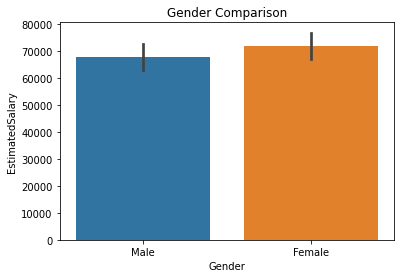

In [6]:
# Gender comparison based on estimated salary

sns.barplot(x=df.Gender, y=df.EstimatedSalary).set(title='Gender Comparison')

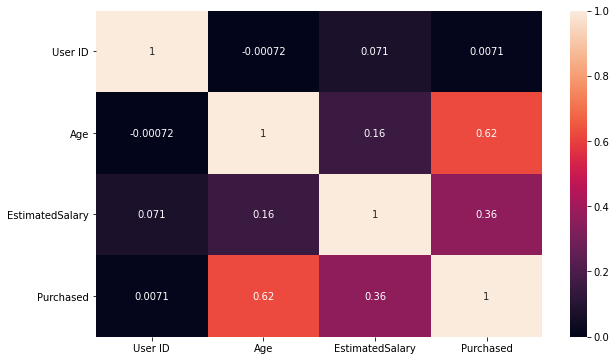

In [7]:
# Correlation matrix
plt.figure(figsize=(10, 6)) # figure size
sns.heatmap(df.corr(), annot=True) #annot is used to give value
plt.show()

## Processing the data

In [8]:
# Slice independent and dependent variables
X = df.iloc[:, [1,2,3]].values
y = df.iloc[:, -1].values

In [9]:
print("This is the value from X:\n", X)
print('\n')
print('This is the value from y:\n', y)

This is the value from X:
 [['Male' 19 19000]
 ['Male' 35 20000]
 ['Female' 26 43000]
 ...
 ['Female' 50 20000]
 ['Male' 36 33000]
 ['Female' 49 36000]]


This is the value from y:
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]


As you can see there is character in the X dataset, it locate in 0 index

First, we to make sure how unique the data

In [10]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

Because there is only to differencies, we can deal it using LabelEncoder for encoding it

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [12]:
print("New value of X:\n", X)

New value of X:
 [[1 19 19000]
 [1 35 20000]
 [0 26 43000]
 ...
 [0 50 20000]
 [1 36 33000]
 [0 49 36000]]


## Split the data

In [13]:
df.shape

(400, 5)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## KNN model

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
# Predict the test set
y_pred = knn_model.predict(X_test)

In [18]:
# y_test
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [19]:
# y_pred
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

## Evaluate the model

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [21]:
# Confusion matrix
cm

array([[55,  3],
       [ 1, 21]])

In [22]:
# Accuracy score
ac

0.95

Well done, the model got accuracy score: 0.95